<a href="https://colab.research.google.com/github/AnaKarenDRIV/FinanzasUniversitarias/blob/main/RED%20NEURONAL%20MULTI%20CAPA%20/Clasificaci%C3%B3n_de_un_candidato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# Generar dataset sintético con diferentes rangos por habilidad
n_muestras = 5000
# Habilidades técnicas: 70-100
tec = np.random.randint(70, 101, (n_muestras, 6))
# Habilidades matemáticas: 60-90
mat = np.random.randint(60, 91, (n_muestras, 6))
# Habilidades psicológicas: 50-85
psi = np.random.randint(50, 86, (n_muestras, 6))
# Nombres de columnas
columnas = [
    'python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube',
    'estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado',
    'trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas'
]
# Crear DataFrame
df = pd.DataFrame(np.concatenate([tec, mat, psi], axis=1), columns=columnas)

In [2]:
print (tec)

[[ 97  88  77  70  77  89]
 [ 97  72 100  74  87  79]
 [ 84  85  78  74  74  83]
 ...
 [ 89  72  78  84  70  80]
 [ 90  94  89  82  99  76]
 [ 90  87  70  80  78  98]]


In [3]:
print (mat)

[[88 68 81 70 74 78]
 [87 61 66 77 89 77]
 [88 90 84 84 78 70]
 ...
 [77 65 70 71 81 67]
 [64 87 67 60 67 69]
 [61 70 82 69 80 68]]


In [4]:
print (psi)

[[62 55 69 83 84 72]
 [61 55 50 76 84 74]
 [51 56 81 76 81 84]
 ...
 [77 68 52 85 50 67]
 [70 54 63 53 66 52]
 [55 55 57 79 58 60]]


In [5]:
df

,python,sql,visualizacion_datos,excel,manejo_apis,nube,estadistica,probabilidad,algebra_lineal,calculo,optimizacion,modelado,trabajo_equipo,comunicacion,creatividad,adaptabilidad,liderazgo,resolucion_problemas
0,97,88,77,70,77,89,88,68,81,70,74,78,62,55,69,83,84,72
1,97,72,100,74,87,79,87,61,66,77,89,77,61,55,50,76,84,74
2,84,85,78,74,74,83,88,90,84,84,78,70,51,56,81,76,81,84
3,98,98,74,89,84,72,89,79,66,65,84,78,60,67,85,55,84,85
4,77,96,75,78,93,90,76,81,84,90,79,69,84,58,68,55,51,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,92,83,74,90,77,95,69,69,83,74,67,80,70,85,61,59,77,81
4996,97,71,88,85,75,91,67,63,85,64,81,62,59,83,66,58,84,66
4997,89,72,78,84,70,80,77,65,70,71,81,67,77,68,52,85,50,67
4998,90,94,89,82,99,76,64,87,67,60,67,69,70,54,63,53,66,52


AXIIS = 0 ES COLUMNA

AXIS = 1 ES FILA

In [6]:
# Calcular promedio por grupo y promedio total
prom_tecnologicas = df[['python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube']].mean(axis=1)
prom_matematicas  = df[['estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado']].mean(axis=1)
prom_psicologicas = df[['trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas']].mean(axis=1)
# Promedio total = promedio de los 3 promedios
prom_total = (prom_tecnologicas + prom_matematicas + prom_psicologicas) / 3
# Etiqueta: 1 = apto si promedio total > 80
y = (prom_total > 75).astype(int)
# one-hot encoding
y = pd.get_dummies(y).values

In [9]:
print(prom_tecnologicas)

0       83.000000
1       84.833333
2       79.666667
3       85.833333
4       84.833333
          ...    
4995    85.166667
4996    84.500000
4997    78.833333
4998    88.333333
4999    83.833333
Length: 5000, dtype: float64


In [8]:
print(prom_matematicas)

0       76.500000
1       76.166667
2       82.333333
3       76.833333
4       79.833333
          ...    
4995    73.666667
4996    70.333333
4997    71.833333
4998    69.000000
4999    71.666667
Length: 5000, dtype: float64


In [10]:
print(prom_psicologicas)

0       70.833333
1       66.666667
2       71.500000
3       72.666667
4       65.500000
          ...    
4995    72.166667
4996    69.333333
4997    66.500000
4998    59.666667
4999    60.666667
Length: 5000, dtype: float64


apto // no apto      ------ dependiendo se donde sea es el resultado

In [7]:
print(y)

[[False  True]
 [False  True]
 [False  True]
 ...
 [ True False]
 [ True False]
 [ True False]]


Obtenemos los conjuntos de entrenamiento y de test

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42
)

# Escalamiento
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

test 20% ---- tcoin 80%

> semilla



In [13]:
print(X_test)

[[ 1.32656391  0.20832116 -1.1056011  ... -0.43563464  1.40088094
  -1.2074116 ]
 [ 1.10061677  0.32050272  1.46063417 ... -0.04671855  0.34720889
  -0.15607561]
 [-0.14209251 -1.58658383  0.67960605 ...  0.43942657  0.34720889
   0.03507639]
 ...
 [-1.49777536  1.44231834 -0.43614842 ... -1.69961193 -1.66434685
  -0.06049961]
 [-0.48101322 -1.3622207  -0.88245021 ...  1.12002973  1.01772747
   1.08641239]
 [-0.9329075  -0.46476821  0.23330426 ... -0.53286366 -0.6106748
  -0.44280361]]


In [14]:
print(X_train)

[[-1.15885464  1.21795521 -0.32457297 ...  0.73111364  1.01772747
   0.99083639]
 [ 1.55251105  0.32050272  1.23748328 ...  1.41171679 -0.03594459
   0.70410839]
 [ 0.64872249 -0.57694977  1.12590783 ...  1.60617484  0.63457399
   1.46871639]
 ...
 [-1.61074893 -0.57694977  1.46063417 ...  0.1477395  -1.28119337
  -0.53837961]
 [ 1.55251105 -0.35258665  0.23330426 ... -0.92177975 -1.28119337
  -0.06049961]
 [ 0.08385463  1.10577365 -0.88245021 ...  1.31448777  0.73036236
   0.32180439]]


RED NEURONAL

In [ ]:
##18 columnas 500o filads                                    (X_train.shape[1],) sirve para poener todas las filas en caso de que quieras agregar otra
## 3 capas                                                        https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense      (link de las funciones)
## 64 neuronas
## 32 neuronas
## 16 neuronas


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')
])

adam = Adam(learning_rate=0.001)
modelo.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
### alternacion de datos por 500 batch_size=8
## no entrenar todos los datos completos o es sobre ajuste
## loss: 4.4955e-08 - val_accuracy: 0.9790 - val_loss: 0.1513                 tienen que star a la par    si una tiende hacia riba y la otra hacia abjo esta haciendo sobre ajuste o ajuste
## batch_size=8     lo divide ente 20, 8 etc

In [17]:
history_prueba = modelo.fit(
    X_train, y_train,
    epochs=50,
    batch_size=20,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 2.6106e-08 - val_accuracy: 0.9790 - val_loss: 0.1561
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 2.8145e-08 - val_accuracy: 0.9790 - val_loss: 0.1572
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 2.1981e-08 - val_accuracy: 0.9790 - val_loss: 0.1584
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.9475e-08 - val_accuracy: 0.9790 - val_loss: 0.1593
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.5859e-08 - val_accuracy: 0.9790 - val_loss: 0.1598
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.3511e-08 - val_accuracy: 0.9790 - val_loss: 0.1613
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.2948e-08 - val_accuracy: 0.9790 - val_loss: 0.1618
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - los

In [18]:
!pip install matplotlib

In [16]:
history = modelo.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7966 - loss: 0.3935 - val_accuracy: 0.9520 - val_loss: 0.1116
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9703 - loss: 0.0702 - val_accuracy: 0.9710 - val_loss: 0.0699
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9873 - loss: 0.0410 - val_accuracy: 0.9650 - val_loss: 0.0880
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9867 - loss: 0.0330 - val_accuracy: 0.9720 - val_loss: 0.0667
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9962 - loss: 0.0180 - val_accuracy: 0.9770 - val_loss: 0.0576
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9929 - loss: 0.0174 - val_accuracy: 0.9720 - val_loss: 0.0765
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9946 - loss: 0.0144 - val_accuracy: 0.9780 - val_loss: 0.0748
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9987 - loss: 0.0068 - val_accuracy: 0.

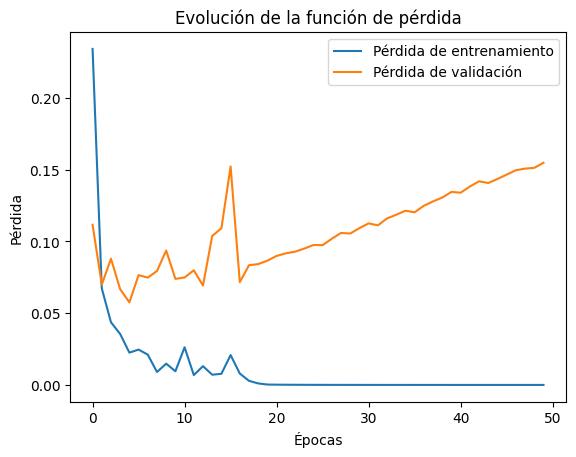

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9772 - loss: 0.1789

🔹 Loss: 0.1843  |  Accuracy: 0.9790


In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la función de pérdida')
plt.show()

loss, acc = modelo.evaluate(X_test, y_test)
print(f"\n🔹 Loss: {loss:.4f}  |  Accuracy: {acc:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


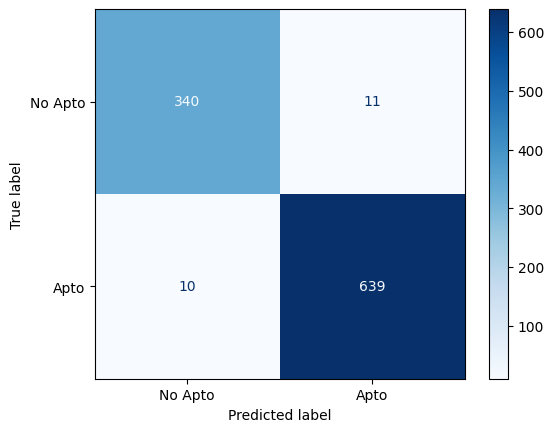


Sensitivity (Recall) por clase:
No Apto: 0.97
Apto: 0.98


In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

pred = modelo.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Apto', 'Apto'])
disp.plot(cmap='Blues')
plt.show()

sensitivity = recall_score(y_true, y_pred, average=None)
print("\nSensitivity (Recall) por clase:")
print(f"No Apto: {sensitivity[0]:.2f}")
print(f"Apto: {sensitivity[1]:.2f}")

In [ ]:
##la metriz de confucion se ve bonita apesar de que el modelo tiene sobre ajuste


# analizar
# funcion de perdida
# matriz de confucion

In [ ]:
nuevo_candidato = np.array([[90, 88, 85, 87, 84, 89,   # técnicas
                             82, 86, 85, 83, 87, 80,   # matemáticas
                             70, 75, 80, 72, 78, 74]]) # psicológicas

nuevo_candidato_scaled = scaler.transform(nuevo_candidato)
pred_nuevo = modelo.predict(nuevo_candidato_scaled)
clase_predicha = np.argmax(pred_nuevo)

print("Evaluación de nuevo candidato:")
print(f"Resultado: {'Apto' if clase_predicha == 1 else 'No Apto'}")

In [ ]:
nuevo_candidato = np.array([[90, 88, 85, 87, 84, 89,   # técnicas
                             82, 86, 85, 83, 87, 80,   # matemáticas
                             70, 75, 80, 72, 78, 74]]) # psicológicas

nuevo_candidato_scaled = scaler.transform(nuevo_candidato)
pred_nuevo = modelo.predict(nuevo_candidato_scaled)
clase_predicha = np.argmax(pred_nuevo)

print("Evaluación de nuevo candidato:")
print(f"Resultado: {'Apto' if clase_predicha == 1 else 'No Apto'}")